# Artists Markets Analysis


In [60]:
#!pip install sqldf
#!pip install lux
#!pip install statsmodels

In [291]:
#Import all necessary libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqldf 
import lux
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [133]:
# reading the CSV file
df = pd.read_csv("C:\\Users\\13128\\Downloads\\Bhavya_artist_market_case_study_vp_analytics.csv")
# displaying the contents of the CSV file
df.head(3)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Exploratory Data Analysis

Step 1: 
* Remove outliers from original dataset to obtain a clean dataset for testing. 
* We will later use the original dataset to see differences between results with removing outliers vs without. 

In [304]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.15) #can use 25 but we conservatively use 0.05 and 0.95 due to small dataset 
    Q3 = df.quantile(0.85) #can use 75
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(df)

# Non-Outlier Subset of the Given Dataset
dfSubset = df[nonOutlierList]

Step 2: Calculate Price to Low Estimate ratio. Gain is (PRICE - LOW_ESTIMATE OR HIGH ESTIMATE - PRICE)

In [306]:
dfSubset['ple'] = (dfSubset['price_usd']/ dfSubset['low_estimate_usd']).round(3)
dfSubset["gain_over_low_estimate"] = dfSubset['price_usd'] - dfSubset['low_estimate_usd']

In [307]:
dfSubset.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Category', ylabel='price_usd'>

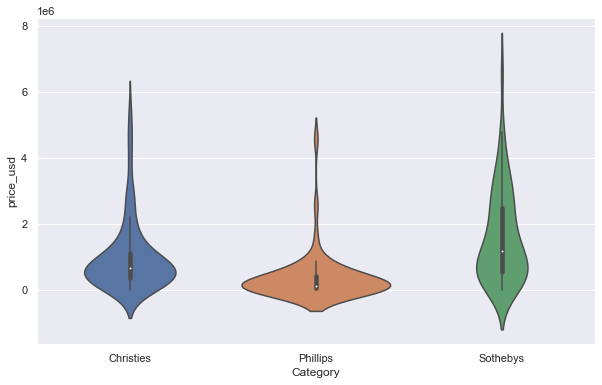

In [153]:
#The violin plot shows that Sothebys saw the highest priced artworks sold. 

sns.violinplot(data=dfSubset, x="Category", y="price_usd")

In [308]:

#PLE ratio and low_estimate_usd relationshp
import altair as alt

source = dfSubset

alt.Chart(source).mark_circle(size=80).encode(
    x='ple',
    y='low_estimate_usd',
    color='Category',
    tooltip=['artist_name', 'artwork_title', 'price_usd', 'high_estimate_usd']
).interactive()

alt.Chart(...)

In [309]:
import plotly.express as px
fig = px.histogram(dfSubset, x="low_estimate_usd", y="price_usd", color="Category",
                   marginal="box", # or violin, rug
                   hover_data=dfSubset.columns)
fig.show()


PLE vs Low estimate

Text(0, 0.5, 'low_estimate_usd')

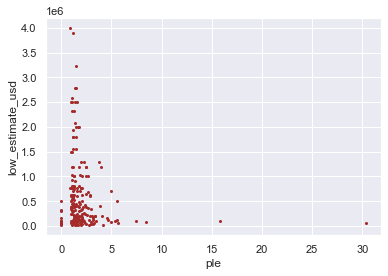

In [310]:
plt.plot(dfSubset.ple, dfSubset.low_estimate_usd,'o',markersize=2, color='brown')
plt.xlabel('ple')
plt.ylabel('low_estimate_usd')

PLE ratio vs High Estimate

Text(0, 0.5, 'high_estimate_usd')

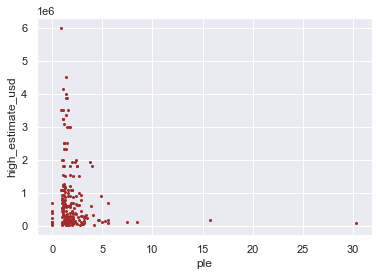

In [311]:
plt.plot(dfSubset.ple, dfSubset.high_estimate_usd,'o',markersize=2, color='brown')
plt.xlabel('ple')
plt.ylabel('high_estimate_usd')

Price vs High Estimate

Text(0, 0.5, 'high_estimate_usd')

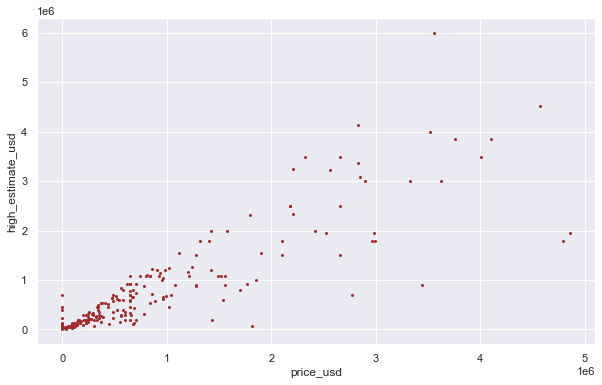

In [162]:
plt.plot(dfSubset.price_usd, dfSubset.high_estimate_usd,'o',markersize=2, color='brown')
plt.xlabel('price_usd')
plt.ylabel('high_estimate_usd')

Overview of Artists & artwork prices -Sothebys.

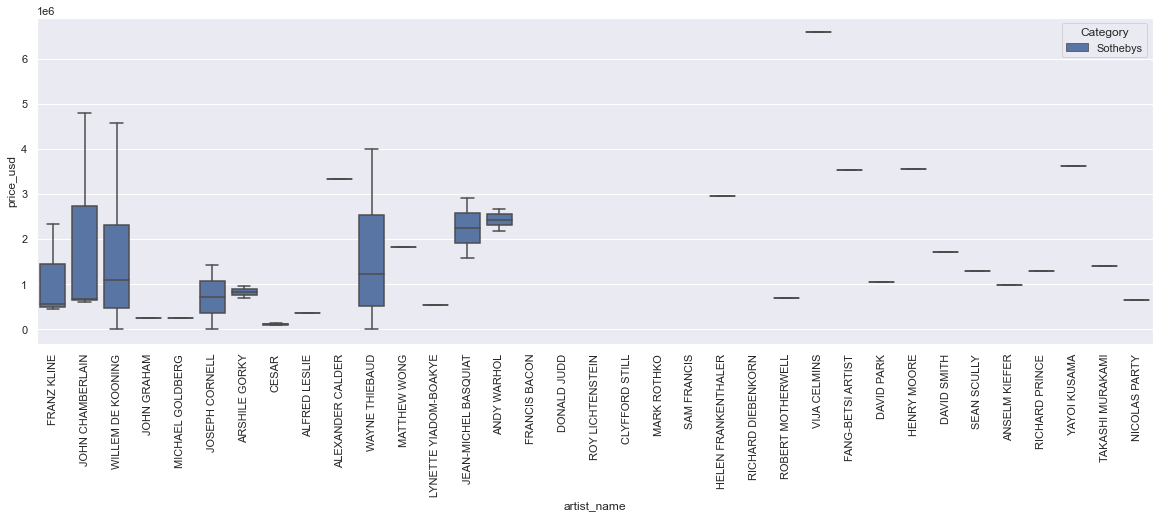

In [165]:
sns.set(rc={"figure.figsize":(20, 6)}) #width=8, height=4

df_Sothebys = dfSubset[dfSubset.Category =='Sothebys']
ax=sns.boxplot(data=df_Sothebys, x="artist_name", y="price_usd",hue='Category').plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

Overview of Artists & artwork prices -Phillips.

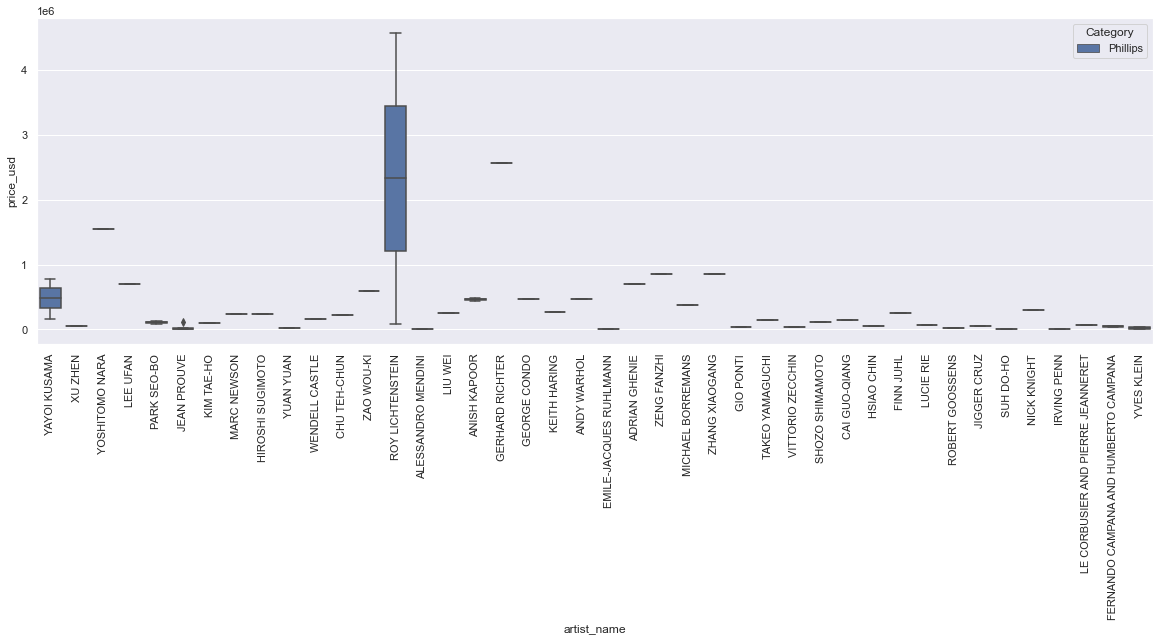

In [166]:
sns.set(rc={"figure.figsize":(20, 6)}) #width=8, height=4

df_Phillips= dfSubset[dfSubset.Category =='Phillips']
ax=sns.boxplot(data=df_Phillips, x="artist_name", y="price_usd",hue='Category').plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

Overview of Artists & artwork prices -Christies.

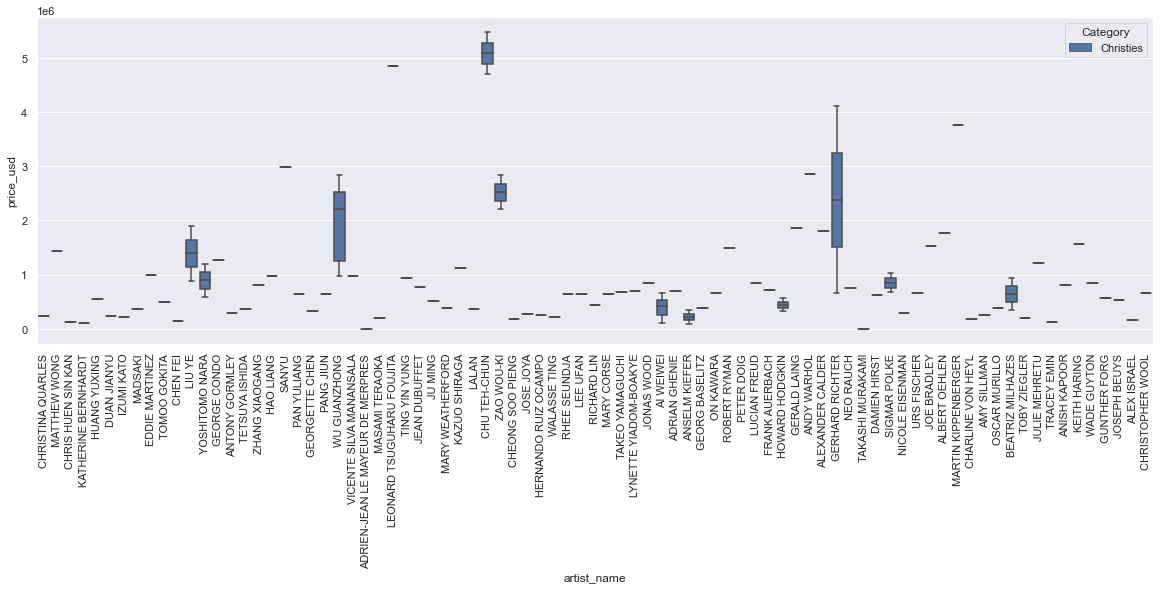

In [167]:
sns.set(rc={"figure.figsize":(20, 6)}) #width=8, height=4

df_Christies= dfSubset[dfSubset.Category =='Christies']
ax=sns.boxplot(data=df_Christies, x="artist_name", y="price_usd",hue='Category').plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

Representing all above in one graph for comparison.

In [168]:
palette = {
    'Christies': 'tab:red',
    'Phillips': 'tab:green',
    'Sothebys': 'tab:orange'
}


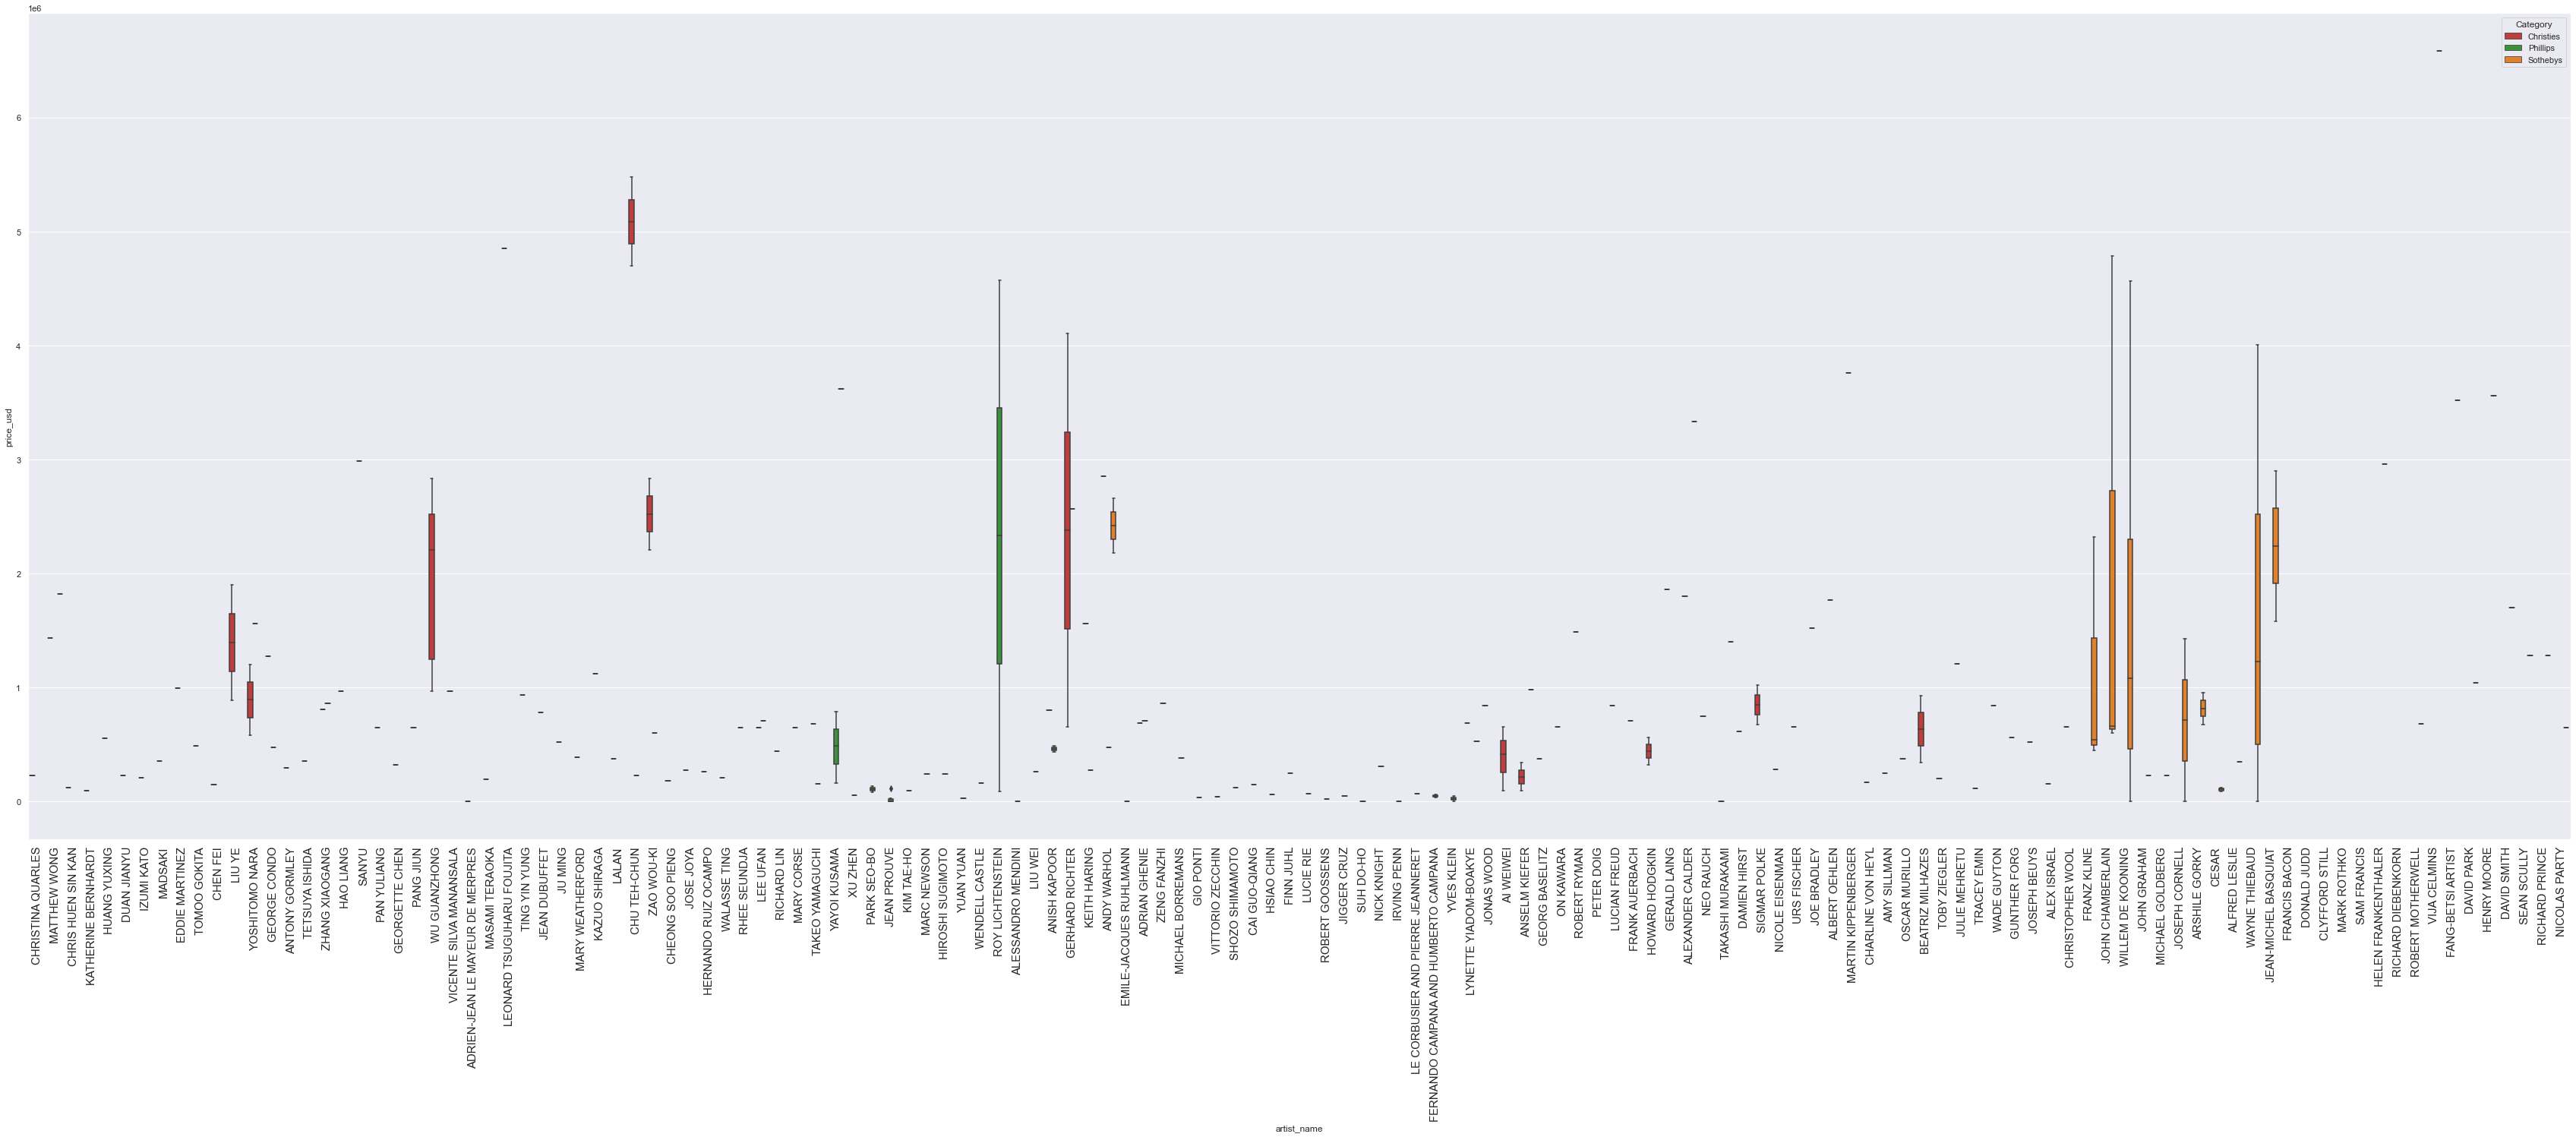

In [169]:


sns.set(rc={"figure.figsize":(60, 20)}) #width=8, height=4

ax=sns.boxplot(data=dfSubset, x="artist_name", y="price_usd",hue='Category', palette=palette)
plt.xticks(rotation=90,fontsize=15)

plt.show()

# Data Architecture


# 1. Storing: How would you store the data given a scraping script written in Python? 

In [ ]:
#Step 1 − First we need an AWS account which will provide us the secret keys for using in our Python script while storing the data. It will create a S3 bucket in which we can store our data.

In [170]:
!pip install boto3

In [171]:
import requests
import boto3
#Now we can scrape the data from our URL/python script to store in AWS S3 bucket.

In [ ]:
#Step 2− Next, we can put the Python script for scraping data from web page and save it to AWS S3 bucket.
#Step3: First, we need to import Python libraries for scraping, here we are working with requests, and boto3 saving data to S3 bucket.

# 2. What service(s) would you use? :

 AWS S3 or SQL Server Studio or Presto based platforms. 
 
I would use boto3 package to store files into S3, or in absence of that into SQL server studio or use beautiful soup packages to directly scrape from API. 

# 3. What partitions would you perform on the existing dataset to avoid unnecessary occurrences?

Recommended partitions are date a record about the artist information is added, any indicator that the artwork is active for auction,  unique auction sale identifier as well as Category (Sotheby's, Christies, Philips).

# 4. Extracting: Based on your answer to the previous question, how would you extract data from where it is stored?

# 5. Displaying analytics: How would you display outcomes, metrics or conclusions? 
For example, where would you display a simple table showing how many artworks were sold by each artist so that it’s accessible by management?




1. The data results obtained here can be directly uploaded to any visualization tools such as Power BI or Tableau or Shiny apps in R and now introduced in Python. 
Tableau is more powerful for data visualizations as we can custom code visuals in tableua syntax. I recommend integration of jupyter notebook with TabPy. 


When we Consider using TabPy. It returns values created by scripts as calculated fields within a workbook.
Otherwise, Tableau purely operates as a layer on top of a source of data. There is no such thing, unfortunately, as loading data directly into it through a jupyter notebook.



In [110]:
query = """
SELECT Category, artist_name, count(artwork_title) as no_of_artworks
FROM df
group by 1,2
order by count(artwork_title) desc
"""

# Run the query
df_artists = sqldf.run(query)
df_artists.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [176]:
df_artists.to_csv('C:\\Users\\13128\\Downloads\\artistscount.csv')

PLE - Price to low_estimate_usd ratio

 1. Using Price divided by Low Estimate (called the PLE ratio) as a metric of beating expectations, what is the relationship between that and the dollar value of the low #estimate?


In [177]:
dfSubset.corr()


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Correlation test

In [178]:
corr1 = dfSubset['low_estimate_usd'].corr(dfSubset['ple'])
corr = dfSubset['ple'].corr(dfSubset['low_estimate_usd'])

print(corr1, corr)

-0.13353669555490374 -0.13353669555490374


Negative Correlation: variables change in opposite directions.
Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.

The following shows the rule of thumb for interpreting the strength of the relationship between two variables based on the value of r:

Absolute value of r	Strength of relationship
* r < 0.25	No relationship
* 0.25 < r < 0.5	Weak relationship
* 0.5 < r < 0.75	Moderate relationship
* r > 0.75	Strong relationship

Chi Sqaured test:

In [202]:
#We also perform The chi-square test of independence to confirm our result above as this test is used to determine whether there is an association between two or more categorical variables. In our case, we would like to test whether the marital status of the applicants has any association with their approval status.
from scipy.stats import linregress
linregress(dfSubset['ple'], dfSubset['low_estimate_usd'])
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dfSubset.ple, dfSubset.low_estimate_usd))

(18429.994047619046,
 0.0006906761545293022,
 17820,
 array([[0.0657277 , 0.0657277 , 0.1314554 , ..., 0.0657277 , 0.0657277 ,
         0.0657277 ],
        [0.00469484, 0.00469484, 0.00938967, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.00469484, 0.00469484, 0.00938967, ..., 0.00469484, 0.00469484,
         0.00469484],
        ...,
        [0.00469484, 0.00469484, 0.00938967, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.00469484, 0.00469484, 0.00938967, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.00469484, 0.00469484, 0.00938967, ..., 0.00469484, 0.00469484,
         0.00469484]]))

In [301]:
import plotly.express as px

#df_2007 = px.data.gapminder().query("year==2007")

fig = px.scatter(dfSubset, y="low_estimate_usd", x="ple", log_x=True, color='Category')
print("plotly express hovertemplate:", fig.data[0].hovertemplate)
fig.update_traces(hovertemplate='low_estimate_usd: %{x} <br>ple: %{y}') #
fig.update_traces(hovertemplate=None, selector={'name':'Europe'}) # revert to default hover
print("user_defined hovertemplate:", fig.data[0].hovertemplate)
fig.show()

plotly express hovertemplate: Category=Christies<br>ple=%{x}<br>low_estimate_usd=%{y}<extra></extra>
user_defined hovertemplate: low_estimate_usd: %{x} <br>ple: %{y}


In [302]:

fig = px.scatter(dfSubset, x="ple", y="low_estimate_usd", log_x=True,color='price_usd',
                 hover_name="Category", hover_data=["Category","artwork_title",'price_usd','high_estimate_usd'])

fig.show()

In [203]:
import altair as alt
import pandas as pd
import numpy as np

source = dfSubset
alt.Chart(source).mark_circle(size=70).encode(
    y='low_estimate_usd',
    x='ple',
    color='Category',
    tooltip=['artist_name', 'artwork_title', 'price_usd', 'high_estimate_usd']
).interactive()


alt.Chart(...)

Result: Weak negative correlation: When one variable (Low_estimate_usd) increases, 
the other variable (PLE ratio) tends to decrease, but in a weak or unreliable manner.

Key finding#1: It is interest for us to know which low_estimated lots actually ended up realizing very high price some times even higher than highest estimate. Once such example, Waine Thiebaud's art work Four Pin Balls Machines study was above the low estimate as well as high estimate.
    

In [204]:
source = dfSubset
alt.Chart(source).mark_circle(size=70).encode(
    y='low_estimate_usd',
    x='price_usd',
    color='Category',
    tooltip=['artist_name', 'artwork_title','low_estimate_usd', 'price_usd', 'high_estimate_usd']
).interactive()


alt.Chart(...)

In [205]:
source = dfSubset
alt.Chart(source).mark_circle(size=70).encode(
    y='high_estimate_usd',
    x='price_usd',
    color='Category',
    tooltip=['artist_name', 'artwork_title','low_estimate_usd', 'price_usd', 'high_estimate_usd']
).interactive()


alt.Chart(...)

# 2. Is the PLE ratio correlated with the order that a lot is auctioned? Do earlier lots perform better than those that come later? .



Result #2: Weak but positive correlation between lot number and PLE. wE therefore investigate further to identify this trend. When one variable (lot_number) increases, 
the other variable (PLE) tends to increase, but in a weak or unreliable manner.There is weak evidence that earlier lots perform better than those that come later. 

In [206]:
corr3 = dfSubset['lot_number'].corr(dfSubset['ple'])
corr4 = dfSubset['ple'].corr(dfSubset['lot_number'])
print(corr3)

0.07631484913774851


In [208]:
#We also perform The chi-square test of independence to confirm our result above as this test is used to determine whether there is an association between two or more categorical variables. In our case, we would like to test whether the marital status of the applicants has any association with their approval status.
from scipy.stats import linregress
linregress(dfSubset['ple'], dfSubset['lot_number'])
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dfSubset.ple, dfSubset.lot_number))

(17880.589285714286,
 0.11526608450903816,
 17655,
 array([[0.1971831 , 0.1971831 , 0.1971831 , ..., 0.0657277 , 0.0657277 ,
         0.0657277 ],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        ...,
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484]]))

The second value of the above output — 0.11526608450903816 -— represents the p-value of the test. 
As evident, the p-value is less than 0.05, hence we reject the null hypothesis that the "PLE" is not associated with the "low_estimate_usd". Result: PLE is associated with low_Estimate_usd.

In [233]:
#We further test our findings from above using a visualization
fig = px.line(dfSubset, x="lot_number", y="price_usd", color="Category", title="Styled Spike Lines")
fig.update_traces(mode="markers+lines")

fig.update_xaxes(showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="orange", spikethickness=2)
fig.update_layout(spikedistance=1000, hoverdistance=100)

fig.show()

From the graph we can see that earlier lots do not necessarily perform better - although in Philips category we see some evidence and in Sothebys - However this is not consistent enough to claim that earlier lots perform better than later. 

In [210]:
import plotly.express as px
fig = px.histogram(dfSubset, x="ple", y="low_estimate_usd", color="artist_name", 
                   hover_data=dfSubset.columns)
fig.show()

In [211]:
import plotly.express as px
fig = px.histogram(dfSubset, x="ple", y="low_estimate_usd", color="Category", 
                   hover_data=dfSubset.columns)
fig.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


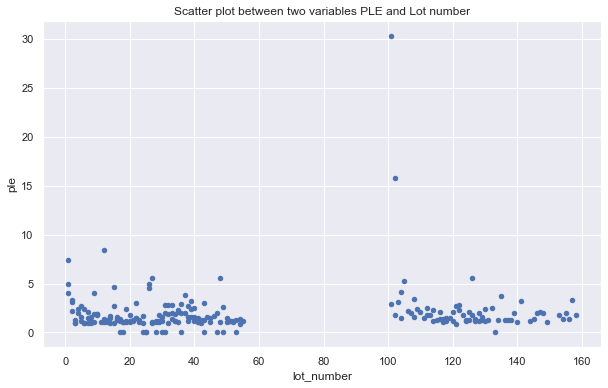

In [212]:

#ALL CATEGORIES NO SEPERATED BY CATEGORY
sns.set(rc={"figure.figsize":(10, 6)}) #width=8, height=4

dataFrame = pd.DataFrame(data=dfSubset, columns=['lot_number','ple']);

# Draw a scatter plot
dataFrame.plot.scatter(x='lot_number', y='ple', title= "Scatter plot between two variables PLE and Lot number");
#plot.show(block=True);

In [213]:
#Data points indicated by colors belonging to different categories
source = dfSubset
alt.Chart(source).mark_circle(size=70).encode(
    y='ple',
    x='lot_number',
    color='Category',
    tooltip=['artist_name', 'artwork_title','low_estimate_usd', 'price_usd', 'high_estimate_usd']
).interactive()


alt.Chart(...)

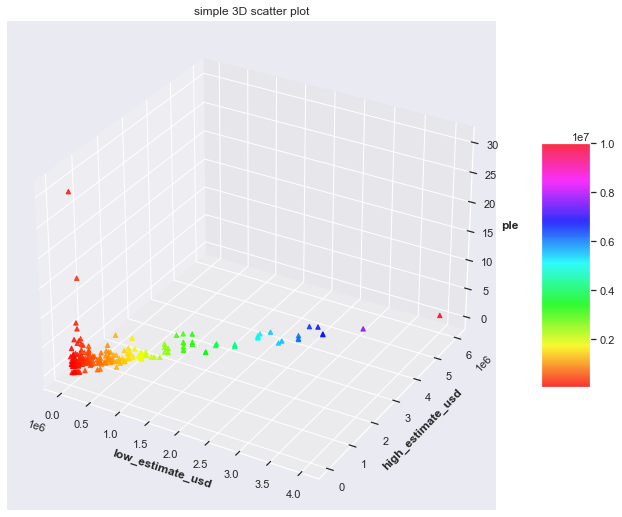

In [214]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = dfSubset.ple
x = dfSubset.low_estimate_usd
y = dfSubset.high_estimate_usd
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='dark',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('low_estimate_usd', fontweight ='bold')
ax.set_ylabel('high_estimate_usd', fontweight ='bold')
ax.set_zlabel('ple', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

In [215]:
dfSubset['realized_price-low_estimate'] =   dfSubset['low_estimate_usd'] - dfSubset['price_usd']
dfSubset['realized_price-high_estimate'] =   dfSubset['high_estimate_usd'] - dfSubset['price_usd']

In [216]:
dfSubset.head(3)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [218]:
#The chi-square test of independence is used to determine whether there is an association between two or more categorical variables. In our case, we would like to test whether the marital status of the applicants has any association with their approval status.
from scipy.stats import linregress
linregress(dfSubset['price_usd'], dfSubset['lot_number'])
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dfSubset.ple, dfSubset.lot_number))

(17880.589285714286,
 0.11526608450903816,
 17655,
 array([[0.1971831 , 0.1971831 , 0.1971831 , ..., 0.0657277 , 0.0657277 ,
         0.0657277 ],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        ...,
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484],
        [0.01408451, 0.01408451, 0.01408451, ..., 0.00469484, 0.00469484,
         0.00469484]]))

The second value of the above output : 0.11526608450903816 which represents the p-value of the test. 
As evident, the p-value is not less than 0.05, hence we accept the null hypothesis that the "PLE" is not associated with the "price_usd". Result: PLE is not associated with order of lot_number.

0.8656531604106271


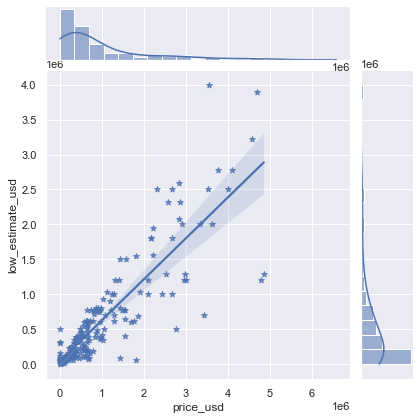

In [258]:
#1 Scatter plot between price and low_estimate

# here "*" is used as a marker for scatterplot
sns.jointplot(data=dfSubset, x="price_usd", y="low_estimate_usd", kind="reg", marker="*")
corr_btw_low_estimate_and_PLE = dfSubset['low_estimate_usd'].corr(dfSubset['price_usd'])
print(corr_btw_low_estimate_and_PLE)

# APPENDIX - Further Exploration

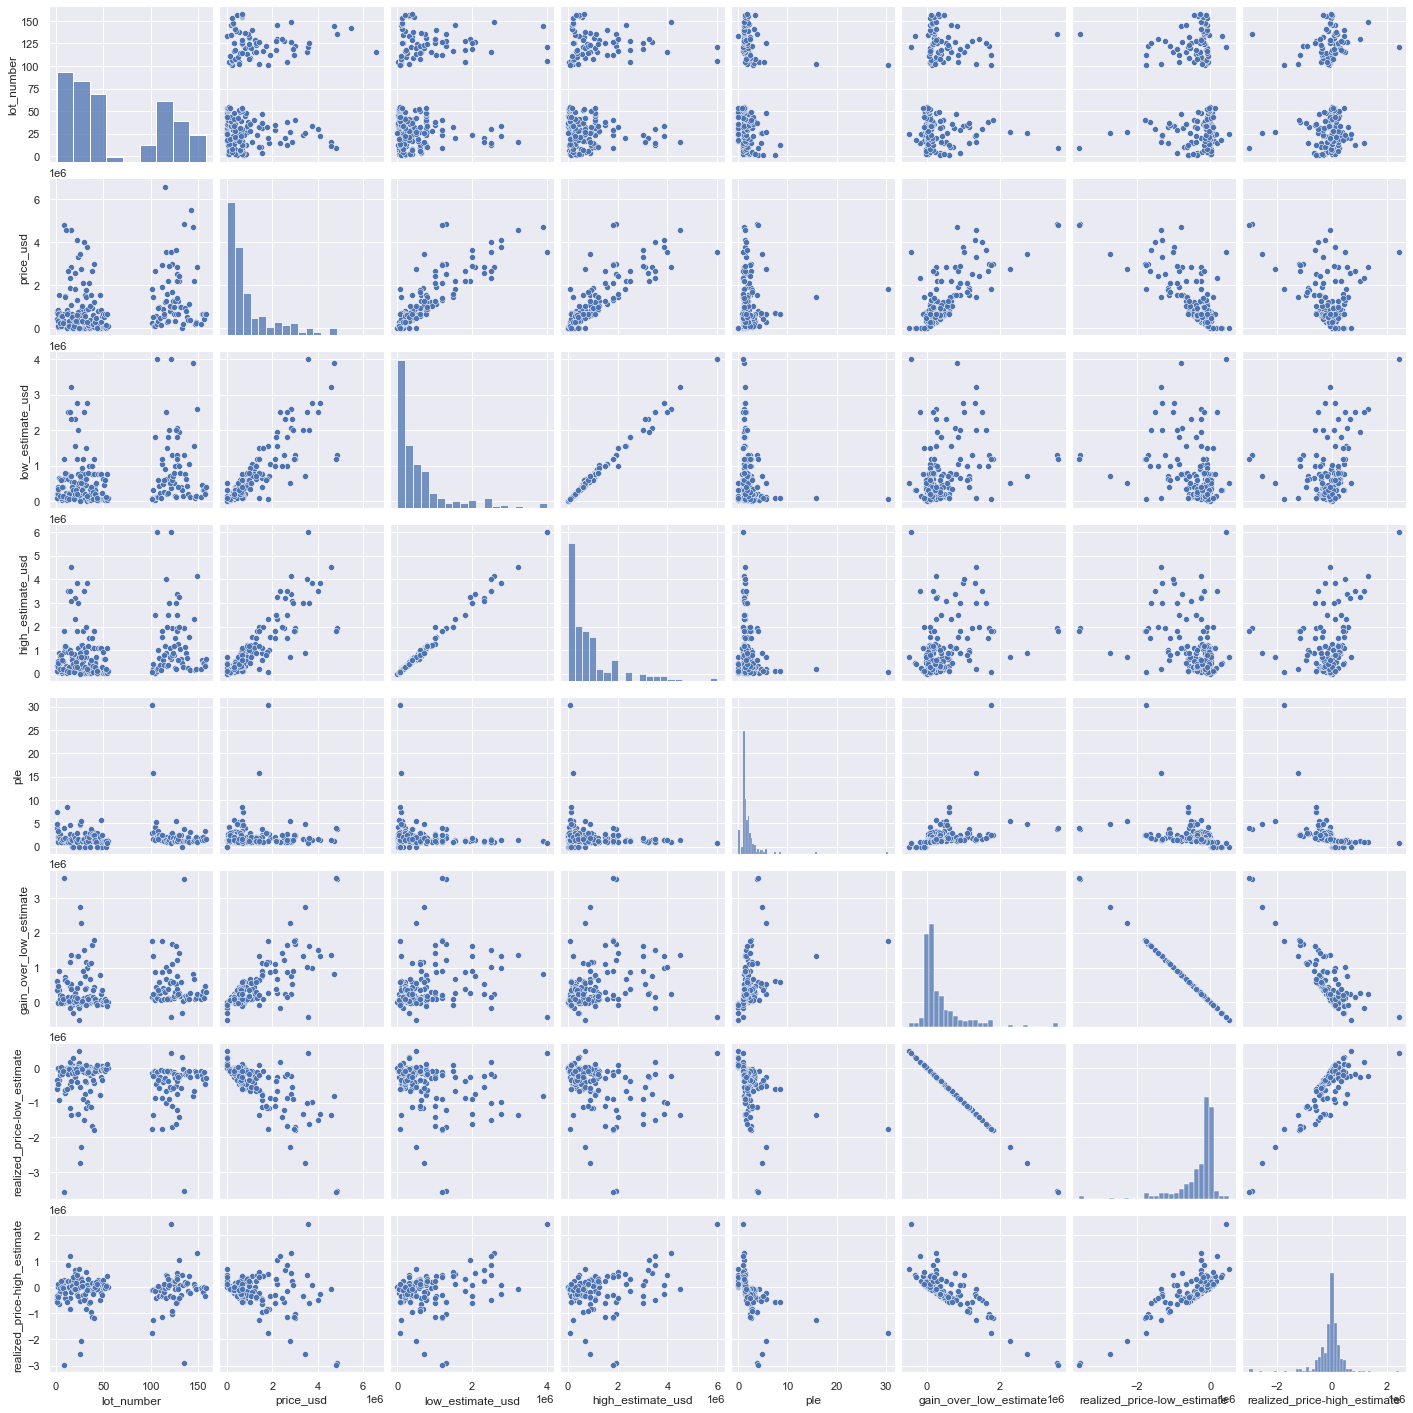

In [219]:
sns.pairplot(dfSubset, kind="scatter")
plt.show()


In [234]:
dfSubset.artist_name.unique()

array(['CHRISTINA QUARLES', 'MATTHEW WONG', 'CHRIS HUEN SIN KAN',
       'KATHERINE BERNHARDT', 'HUANG YUXING', 'DUAN JIANYU', 'IZUMI KATO',
       'MADSAKI', 'EDDIE MARTINEZ', 'TOMOO GOKITA', 'CHEN FEI', 'LIU YE',
       'YOSHITOMO NARA', 'GEORGE CONDO', 'ANTONY GORMLEY',
       'TETSUYA ISHIDA', 'ZHANG XIAOGANG', 'HAO LIANG', 'SANYU',
       'PAN YULIANG', 'GEORGETTE CHEN', 'PANG JIUN', 'WU GUANZHONG',
       'VICENTE SILVA MANANSALA', 'ADRIEN-JEAN LE MAYEUR DE MERPRES',
       'MASAMI TERAOKA', 'LEONARD TSUGUHARU FOUJITA', 'TING YIN YUNG',
       'JEAN DUBUFFET', 'JU MING', 'MARY WEATHERFORD', 'KAZUO SHIRAGA',
       'LALAN', 'CHU TEH-CHUN', 'ZAO WOU-KI', 'CHEONG SOO PIENG',
       'JOSE JOYA', 'HERNANDO RUIZ OCAMPO', 'WALASSE TING',
       'RHEE SEUNDJA', 'LEE UFAN', 'RICHARD LIN', 'MARY CORSE',
       'TAKEO YAMAGUCHI', 'YAYOI KUSAMA', 'XU ZHEN', 'PARK SEO-BO',
       'JEAN PROUVE', 'KIM TAE-HO', 'MARC NEWSON', 'HIROSHI SUGIMOTO',
       'YUAN YUAN', 'WENDELL CASTLE', 'ROY LICHTEN

In [235]:
len(dfSubset.artist_name.unique())

140

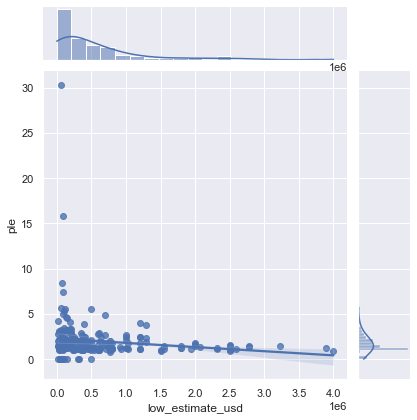

In [267]:
sns.jointplot(x="low_estimate_usd", 
              y="ple",
              kind="reg",
              data=dfSubset)
plt.show()

NEXT STEPS: Other metrics to consider to define stregth

1. MIC (strength) : describes the strength of the relationship between the variables on a scale from 0 (no relationship) to 1 (perfect relationship) 
2. MIC - p^2 (non-linearity) : describes the extent to which the relationship detected is non-linear in nature (p^2 is the value of the Pearson Product-Moment Correlation Coefficient).


In [314]:
size_mapper=LinearInterpolator(
    x=[dfSubset.ple.min(),dfSubset.ple.max()],
    y=[dfSubset.low_estimate_usd.min(),dfSubset.low_estimate_usd.max()]
)



0.8656531604106271


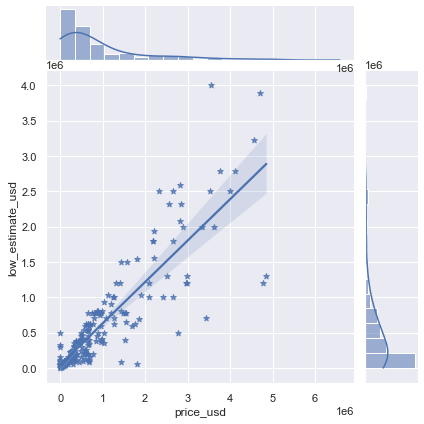

In [315]:
#1 Scatter plot between price and low_estimate

# here "*" is used as a marker for scatterplot
sns.jointplot(data=dfSubset, x="price_usd", y="low_estimate_usd", kind="reg", marker="*")
corr_btw_low_estimate_and_PLE = dfSubset['low_estimate_usd'].corr(dfSubset['price_usd'])
print(corr_btw_low_estimate_and_PLE)

<AxesSubplot:ylabel='Density'>

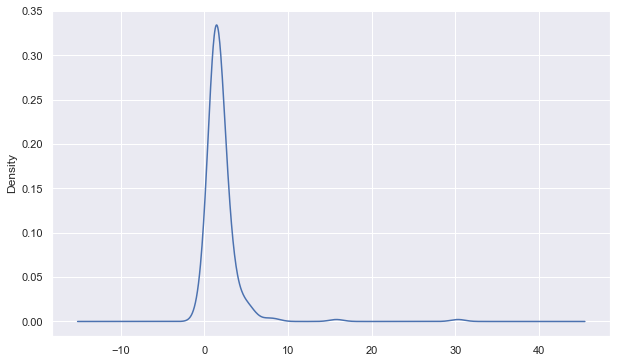

In [220]:
dfSubset['ple'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

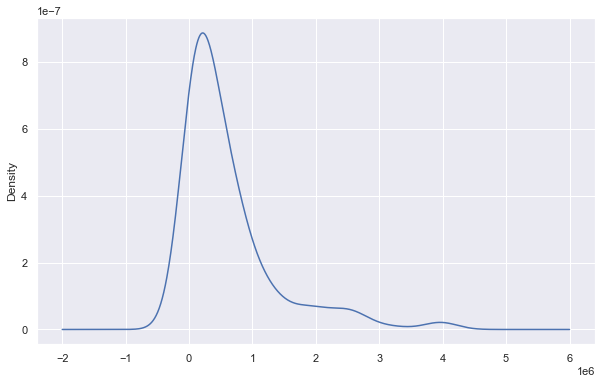

In [221]:
dfSubset['low_estimate_usd'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

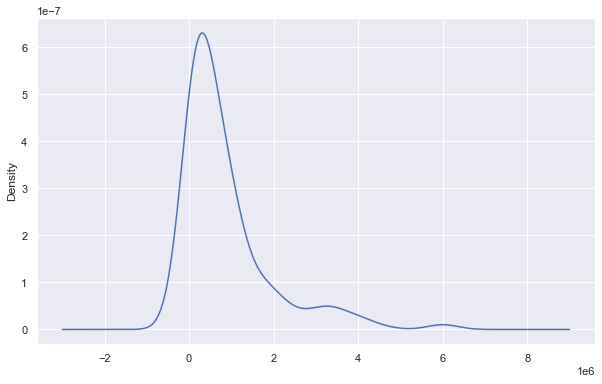

In [222]:
dfSubset['high_estimate_usd'].plot(kind='kde')


In [295]:
from scipy.stats import linregress
linregress(dfSubset['ple'], dfSubset['low_estimate_usd'])


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

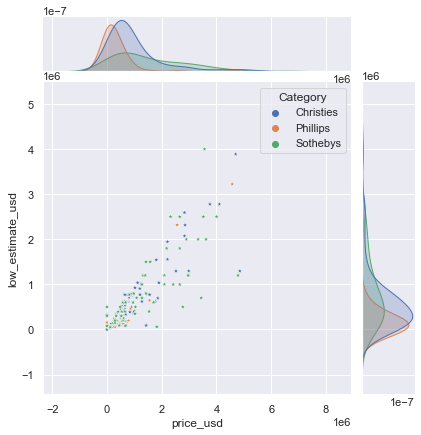

In [296]:

j= sns.jointplot(data=dfSubset, x="price_usd", y="low_estimate_usd", hue="Category",  marker="*")
plt.show()

Non-Parametric Correlation: Kendall(tau) and Spearman(rho), which are rank-based correlation coefficients, are known as non-parametric correlation.

In [299]:
import plotly.express as px
fig = px.scatter(dfSubset, x="ple", y="low_estimate_usd")
fig.show()

In [230]:
dfSubset["artist_name"] = dfSubset["artist_name"].astype(str)
fig = px.scatter(dfSubset, x="ple", y="low_estimate_usd", log_x=True,color='Category',
                 hover_name="Category", 
             title="Relationship between Price to Low Estimate ratio and Low_Estimate in US Dollars", hover_data=["Category","artwork_title",'low_estimate_usd','price_usd','high_estimate_usd'])

fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


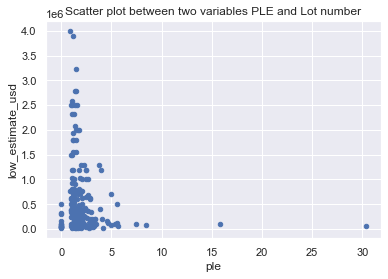

In [303]:
dataFrame = pd.DataFrame(data=dfSubset, columns=['ple','low_estimate_usd']);

dataFrame.plot.scatter(x='ple', y='low_estimate_usd', title= "Scatter plot between two variables PLE and Lot number");


Text(0, 0.5, 'high_estimate_usd')

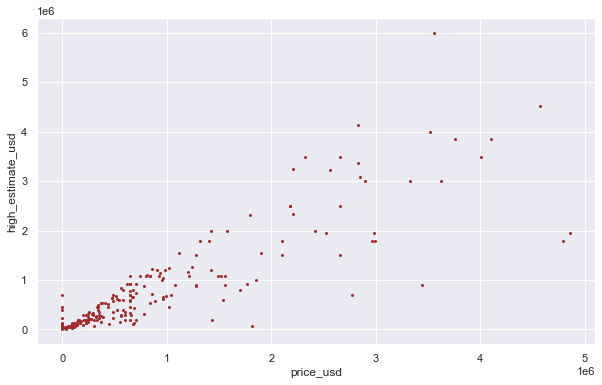

In [232]:
plt.plot(dfSubset.price_usd, dfSubset.high_estimate_usd,'o',markersize=2, color='brown')
plt.xlabel('price_usd')
plt.ylabel('high_estimate_usd')

# CONCLUSION

Current ongoing discussion between online sellers and auctioneers is generally on : 
1) Is it best to list estimated prices that are very low or should the estimates be very close to the hoped-for final prices? 
2) Some sellers may believe a high estimate scares away some bidders. 
3) Many collectors think a low estimate suggests an unseen problem with the piece. 

Primary conclusion for further investigation is to study low estimate but highe selling artworks at a well run well advertised sale by an expert art patron who can describe the art. 

Once we add more features about year of painting,  artist's information, type of painting/colors, size width, origin of painting, locationexhibited at etc,
and all catalog raisonne related metrics of paintings we can  dive deep into insights that can help us penetrate into the artist market and identify high impact high potential artists and their works.. 

In [ ]:
MORE TO ADD....